In [2]:
from bs4 import BeautifulSoup as bs
from bs4 import Comment
import requests
import time, os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import re
import numpy as np
import pandas as pd

chromedriver = '/Applications/chromedriver'
os.environ['webdriver.chrome.driver'] = chromedriver
# driver = webdriver.Chrome(chromedriver)

urltest = "https://www.basketball-reference.com/players/c/curryst01.html"
restest = requests.get(urltest)
urlmain = "https://www.basketball-reference.com/contracts/players.html"
res = requests.get(urlmain)



# players = bs(driver.page_source, 'html.parser')

In [3]:
import patsy
import scipy.stats as stats
from scipy.stats import boxcox 
%config InlineBackend.figure_formats = ['svg']
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [260]:
robot = "https://www.basketball-reference.com/robots.txt"

response = requests.get(robot)
requests.get(robot).status_code

200

In [ ]:
print(response.text)

In [261]:
soup = bs(res.text, "html5lib")

In [262]:
soup_p = soup.find_all("tbody")[-1]

In [ ]:

soup = bs(res.text, "html5lib")
soup_p = soup.find_all("tbody")[-1]
# s = soup_p.find("tr", 'data-row'=='0')

def linkcollect(s):
    s_link = s.find("td", class_='left').find('a').get('href')
    s_name = s.find('td',class_='left').find_all('a')[-1].text
    s_team = s.find_all("td", class_='left')[1].find('a').text
    s_salary = s.find('td',class_='right').text
    headers = ['link','pname','team','salary']
    player_dict = dict(zip(headers, [s_link,s_name,s_team,s_salary]))
    return player_dict

player_dict=[]                       
                       
for i in range(0,590):
    s = soup_p.find_all("tr")[i]
    if i in [20,21,42,43,64,65,86,87,108,109,130,131,152,153,174,175,196,197,218,219\
            ,240,241,262,263,284,285,306,307,328,329,350,351,372,373,394,395,416,417\
            ,438,439,460,461,482,483,504,505,526,527,548,549,570,571]:
        pass
    else:
        player_dict.append(linkcollect(s))
    print(i)
player_dict


In [312]:
playerurls = pd.DataFrame(player_dict)
playerurls.set_index('pname', inplace=True)
playerurls.head()
playerurls.to_csv("playerurls.csv")

In [28]:
playerurls = pd.read_csv('playerurls.csv')

In [860]:
def playerseason(x):
    website = 'https://www.basketball-reference.com'
    url = website + x
    res = requests.get(url)
    page = res.text
    soup = bs(page,'html5lib')
    bio = soup.select_one('div[itemtype="https://schema.org/Person"]')

    headers = ['player_name','height','weight','season','age','team','pos','gameplayed',\
              'gamestarted','minpergame','fgmade','fgattempt','fgpct','threemade',\
              'threeattempt','threepct','twomade','twoattempt','twopct','efgpct',\
              'ftmade','ftattempt','ftpct','offreb','defreb','allreb','assist',\
              'steals','blocks','turnov','pfouls','points']
    
    if soup.select_one('table[id="per_game"]') != None:
        per_game = soup.select_one('table[id="per_game"]')
        cbody = soup.select_one('div[id="all_all_salaries"]')
        comment = cbody.find(text=lambda text:isinstance(text, Comment))
        commentsoup = bs(comment, 'html5lib')
        saltable = commentsoup.find_all('tr')[:]

    
    # Name
    player_name = bio.find('h1').find('span').text
#     # Position
#     for i in bio.find_all('strong'):
#         if i.text.strip() == "Position:":
#             if i.next_sibling.find("Point Guard") >0:
#                 pos = "Point Guard"
#             elif i.next_sibling.find("Shooting Guard") >0:
#                 pos = "Shooting Guard"
#             elif i.next_sibling.find("Small Forward") >0:
#                 pos = "Small Forward"
#             elif i.next_sibling.find("Power Forward") >0:
#                 pos = "Power Forward"
#             elif i.next_sibling.find("Point Guard") >0:
#                 pos = "Center"
#             else:
#                 pos = np.nan
#     # Age
#     # ageraw = bio.select_one('span[id="necro-birth"]').text
#     # Debut
#     debutraw = str()
#     for i in bio.find_all('strong'):
#         if i.text == "NBA Debut: ":
#             debutraw = i.next_sibling.text
    #Height
    height = bio.select_one('span[itemprop="height"]').text
    #Weight
    weight = bio.select_one('span[itemprop="weight"]').text
    
    # Make different years
    dict_list = []

    if soup.select_one('table[id="per_game"]') != None:
        if per_game.find_all('tr') != None:
            for i in range(1,len(per_game.find_all('tr'))-1):

                pgtr = per_game.find_all('tr')
                try:
                    season = pgtr[i].get('id')[-4:]
                except: 
                    season = ''

                row = pgtr[i]

                try:
                    age = row.select_one('td[data-stat="age"]').text
                except:
                    age = ''

                try:
                    team = row.select_one('td[data-stat="team_id"]').text
                except:
                    team = ''

                try:
                    pos = row.select_one('td[data-stat="pos"]').text
                except:
                    pos = ''

                try:
                    gameplayed = row.select_one('td[data-stat="g"]').text
                except:
                    gameplayed = ''

                try:
                    gamestarted = row.select_one('td[data-stat="gs"]').text
                except:
                    gamestarted = ''

                try:
                    minpergame = row.select_one('td[data-stat="mp_per_g"]').text
                except:
                    minpergame = ''

                try:
                    fgmade = row.select_one('td[data-stat="fg_per_g"]').text
                except:
                    fgmade = ''

                try:
                    fgattempt = row.select_one('td[data-stat="fga_per_g"]').text
                except:
                    fgattempt = ''

                try:
                    fgpct = row.select_one('td[data-stat="fg_pct"]').text
                except:
                    fgpct = ''

                try:
                    threemade = row.select_one('td[data-stat="fg3_per_g"]').text
                except:
                    threemade = ''

                try:
                    threeattempt = row.select_one('td[data-stat="fg3a_per_g"]').text
                except:
                    threeattempt = ''

                try:
                    threepct = row.select_one('td[data-stat="fg3_pct"]').text
                except:
                    threepct = ''

                try:
                    twomade = row.select_one('td[data-stat="fg2_per_g"]').text
                except:
                    twomade = ''

                try:
                    twoattempt = row.select_one('td[data-stat="fg2a_per_g"]').text
                except:
                    twoattempt = ''

                try:
                    twopct = row.select_one('td[data-stat="fg2_pct"]').text
                except:
                    twopct = ''

                try:
                    efgpct = row.select_one('td[data-stat="efg_pct"]').text
                except:
                    efgpct = ''

                try:
                    ftmade = row.select_one('td[data-stat="ft_per_g"]').text
                except: 
                    ftmade = ''

                try:
                    ftattempt = row.select_one('td[data-stat="fta_per_g"]').text
                except:
                    ftattempt = ''

                try:
                    ftpct = row.select_one('td[data-stat="ft_pct"]').text
                except:
                    ftpct = ''

                try:
                    offreb = row.select_one('td[data-stat="orb_per_g"]').text
                except:
                    offreb = ''

                try:
                    defreb = row.select_one('td[data-stat="drb_per_g"]').text
                except:
                    defreb = ''

                try:
                    allreb = row.select_one('td[data-stat="trb_per_g"]').text
                except:
                    allreb = ''

                try:
                    assist = row.select_one('td[data-stat="ast_per_g"]').text
                except:
                    assist = ''

                try:
                    steals = row.select_one('td[data-stat="stl_per_g"]').text
                except:
                    steals = ''

                try:
                    blocks = row.select_one('td[data-stat="blk_per_g"]').text
                except:
                    blocks = ''

                try: 
                    turnov = row.select_one('td[data-stat="tov_per_g"]').text
                except:
                    turnov = ''

                try:
                    pfouls = row.select_one('td[data-stat="pf_per_g"]').text
                except:
                    pfouls = ''

                try: 
                    points = row.select_one('td[data-stat="pts_per_g"]').text
                except:
                    points = ''

                newdict = dict(zip(headers, [player_name,height,weight,\
                                             season,age,team,pos,gameplayed,\
                      gamestarted,minpergame,fgmade,fgattempt,fgpct,threemade,\
                      threeattempt,threepct,twomade,twoattempt,twopct,efgpct,\
                      ftmade,ftattempt,ftpct,offreb,defreb,allreb,assist,\
                      steals,blocks,turnov,pfouls,points]))
                dict_list.append(newdict)
            
#     else:
# #         return dict(zip(headers, ['']*33))
#         return None

    return dict_list

In [26]:
def playersalary(x):
    website = 'https://www.basketball-reference.com'
    url = website + x
    res = requests.get(url)
    page = res.text
    soup = bs(page,'html5lib')
    bio = soup.select_one('div[itemtype="https://schema.org/Person"]')
    player_name = bio.find('h1').find('span').text
#     newdict_s = {}
    dict_list = []
    headers=['player_name','season','team','salary']
    if soup.select_one('table[id="per_game"]') != None:
        cbody = soup.select_one('div[id="all_all_salaries"]')
        comment = cbody.find(text=lambda text:isinstance(text, Comment))
        commentsoup = bs(comment, 'html5lib')
        saltable = commentsoup.find_all('tr')[:]
 
        for i in range(1,len(saltable)-1):
            soup_s = bs(saltable[i].text,'html5lib')
#             if saltable[i].text.find("$Minimum") != -1:
            season = int(soup_s.text[:4])+1
            try:
                team = saltable[i].find('a').text
            except:
                team = ''
            try:
                salary = soup_s.find_all('td')[-1].text
            except:
                salary = soup_s.text[-11:]
#             salarylist.append([player_name, int(soup_s.text[:4])+1, soup_s.text[-11:]])
            newdict_s = dict(zip(headers,[player_name, season, team, salary]))
            dict_list.append(newdict_s)
#             else:
#                 salarylist.append([player_name, int(soup_s.text[:4])+1, 0])    
#                 newdict_s = dict(zip(['player_name','season','salary'],[salarylist]))

        return dict_list

In [31]:
# playerstats = []
# playersalaries = []
psal2 = []

In [32]:
count = 0 
# for link in playerurls.link:
#     playerstats.append(playerseason(link))
#     count+=1
#     print(count)
for link in playerurls.link:
    psal2.append(playersalary(link))
    count+=1
    print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [33]:
# pstats = []
# for i in playerstats:
#     if i != None: 
#         for j in i:
#             pstats.append(j)
            
psalary = []
for i in psal2:
    if i != None:
        for j in i:
            psalary.append(j)

In [34]:
dfp = pd.DataFrame(pstats)
dfs = pd.DataFrame(psalary)


In [35]:
dfp.to_csv("stats.csv")
dfs.to_csv("salaries.csv")

In [405]:
dfp = pd.read_csv("stats.csv")
dfs = pd.read_csv("salaries.csv")

In [406]:
dfp.drop(dfp.iloc[:,0:1], axis=1, inplace=True)

In [407]:
dfs.drop(dfs.iloc[:,0:1],axis=1, inplace=True)

In [408]:
teamlist = list(dfp.team.unique())
teamlist_s = list(dfs.team.unique())

In [409]:
teamdict = {'Golden State Warriors':'GSW','Washington Wizards':'WAS', 'Oklahoma City Thunder':'OKC',\
            'Portland Trail Blazers':'POR', 'Cleveland Cavaliers':'CLE', 'Milwaukee Bucks':'MIL',\
            'Indiana Pacers':'IND', 'San Antonio Spurs':'SAS', 'Chicago Bulls':'CHI', 'Orlando Magic':'ORL',\
            'New Orleans Pelicans':'NOP', 'Utah Jazz':'UTA','New York Knicks':'NYK','Phoenix Suns':'PHO',\
            'Minnesota Timberwolves':'MIN','Philadelphia 76ers':'PHI','Denver Nuggets':'DEN',\
            'Toronto Raptors':'TOR','New Orleans Hornets':'NOH','Brooklyn Nets':'BKN','Los Angeles Clippers':'LAC',\
            'Los Angeles Lakers':'LAL','Sacramento Kings':'SAC','Miami Heat':'MIA','Boston Celtics':'BOS',\
            'Atlanta Hawks':'ATL','Houston Rockets':'HOU','Charlotte Bobcats':'CHA','Memphis Grizzlies':'MEM',\
            'New Jersey Nets':'NJN','Detroit Pistons':'DET','Charlotte Hornets':'CHO','Dallas Mavericks':'DAL'}

In [410]:
dfs['team'] = dfs.team.map(teamdict)

In [411]:
dfp['season'] = pd.to_numeric(dfp['season'])

In [412]:
df = dfp.merge(dfs, on=["player_name","season","team"], how='left')

In [413]:
df.replace('',np.nan, inplace=True)

In [414]:
df.shape

(4691, 33)

In [415]:
df.dropna(subset=['salary','team'], inplace=True)

In [417]:
# Quinn Cook 4040
# df.drop(index=4040,inplace=True)

In [418]:
def heighttoinch(x):
    return int(x.split('-')[0])*12 + int(x.split('-')[1])
df["height_in"] = df.height.apply(heighttoinch)

def cleanweight(x):
    return int(x.split('lb')[0])
df["weight_lbs"] = df.weight.apply(cleanweight)

In [419]:
def salaryclean(x):
    return x.split('$')[1]
df["salaryusd"] = df.salary.apply(salaryclean)

In [420]:
def salaryclean2(x):
    return x.replace(',','').split('.00')[0]
df["salary_usd"] = df.salaryusd.apply(salaryclean2)

In [8]:

# df.to_csv("check.csv")
df = pd.read_csv("check.csv")
df.drop(df.iloc[:,0:1],axis=1, inplace=True)


In [421]:
dfnew = df.drop(df[df['salary_usd']=="Minimum"].index,axis=0)

In [422]:
dfnew.replace('',np.nan, inplace=True)

In [76]:
# dfnew = df.drop(df[df['team']=="TOT"].index,axis=0)

In [423]:
dfnew.fillna(0, inplace=True)
dfnew = dfnew.apply(pd.to_numeric, errors='ignore')

In [424]:
dfnew = df.drop(['height','weight','salaryusd','salary','team'],axis=1)

In [144]:
# dfnew.to_csv("check.csv")

In [ ]:
# dfnew3[dfnew3.season.isnull()] #2 players - drop for simplicity
# dfnew3[dfnew3.threepct.isnull()][['salary','player_name','season','threepct']] #centers-substitute with 0 (divisor was 0 and so there was no three point attempts ~ 0% pct is fine)
# dfnew3[dfnew3.twopct.isnull()][['salary','player_name','season','twomade','twoattempt','twopct']] #substituet with 0
# dfnew3[dfnew3.efgpct.isnull()][['salary','player_name','season','efgpct']] #threepct guys, substitute with 0
# dfnew3[dfnew3.ftpct.isnull()][['salary','player_name','season','ftmade','ftattempt','ftpct']] #substitute with 0

In [4]:
# dfnew.to_csv("bbr_df2.csv")
dfnew = pd.read_csv("bbr_df2.csv")
dfnew.drop(dfnew.iloc[:,0:1],axis=1, inplace=True)

In [146]:
dfd = dfnew.join(pd.get_dummies(dfnew['pos']))

In [ ]:
dfd.drop(['player_name','pos'], axis=1, inplace=True)

In [426]:
dfnew.head()

,player_name,season,age,pos,gameplayed,gamestarted,minpergame,fgmade,fgattempt,fgpct,threemade,threeattempt,threepct,twomade,twoattempt,twopct,efgpct,ftmade,ftattempt,ftpct,offreb,defreb,allreb,assist,steals,blocks,turnov,pfouls,points,height_in,weight_lbs,salary_usd
0,Stephen Curry,2010.0,21.0,PG,80.0,77.0,36.2,6.6,14.3,0.462,2.1,4.8,0.437,4.5,9.5,0.474,0.535,2.2,2.5,0.885,0.6,3.9,4.5,5.9,1.9,0.2,3.0,3.2,17.5,75,185,2710560
1,Stephen Curry,2011.0,22.0,PG,74.0,74.0,33.6,6.8,14.2,0.480,2.0,4.6,0.442,4.8,9.6,0.498,0.551,2.9,3.1,0.934,0.7,3.2,3.9,5.8,1.5,0.3,3.1,3.1,18.6,75,185,2913840
2,Stephen Curry,2012.0,23.0,PG,26.0,23.0,28.2,5.6,11.4,0.490,2.1,4.7,0.455,3.5,6.7,0.514,0.583,1.5,1.8,0.809,0.6,2.8,3.4,5.3,1.5,0.3,2.5,2.4,14.7,75,185,3117120
3,Stephen Curry,2013.0,24.0,PG,78.0,78.0,38.2,8.0,17.8,0.451,3.5,7.7,0.453,4.5,10.1,0.449,0.549,3.4,3.7,0.900,0.8,3.3,4.0,6.9,1.6,0.2,3.1,2.5,22.9,75,185,3958742
4,Stephen Curry,2014.0,25.0,PG,78.0,78.0,36.5,8.4,17.7,0.471,3.3,7.9,0.424,5.0,9.8,0.509,0.566,3.9,4.5,0.885,0.6,3.7,4.3,8.5,1.6,0.2,3.8,2.5,24.0,75,185,9887642


In [427]:
dfd = dfnew.copy()

## Adding features

In [428]:
dfd = dfd[['salary_usd']+[col for col in dfd if col not in ['salary_usd']]]

In [429]:
dfd = dfd.drop(dfd[dfd['salary_usd']=="Minimum"].index,axis=0)

In [430]:
dfd = dfd.apply(pd.to_numeric, errors='ignore')

In [431]:
dfd.fillna(0, inplace=True)
dfd.info()
# Standardize height by position (test needs to be held out)
# Drop season for now and use it for time series (and therein include autoregressive stats) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2791 entries, 0 to 4684
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   salary_usd    2791 non-null   int64  
 1   player_name   2791 non-null   object 
 2   season        2791 non-null   float64
 3   age           2791 non-null   float64
 4   pos           2791 non-null   object 
 5   gameplayed    2791 non-null   float64
 6   gamestarted   2791 non-null   float64
 7   minpergame    2791 non-null   float64
 8   fgmade        2791 non-null   float64
 9   fgattempt     2791 non-null   float64
 10  fgpct         2791 non-null   float64
 11  threemade     2791 non-null   float64
 12  threeattempt  2791 non-null   float64
 13  threepct      2791 non-null   float64
 14  twomade       2791 non-null   float64
 15  twoattempt    2791 non-null   float64
 16  twopct        2791 non-null   float64
 17  efgpct        2791 non-null   float64
 18  ftmade        2791 non-null 

In [432]:
dfd["def_stat"] = dfd["steals"] + dfd["blocks"]
dfd["def_stat_adj"] = dfd["steals"] + dfd["blocks"] - dfd['pfouls']
dfd["off_eff"] = dfd["assist"]+dfd["points"]-dfd["turnov"]
dfd["starter"] = dfd["gamestarted"] / dfd['gameplayed']

In [433]:
# making the above into a function for later use
def heightz (df):
    df["height_std_by_pos"] = df.groupby("pos").height_in.transform('std')
    df["height_mean_by_pos"] = df.groupby("pos").height_in.transform('mean')
    df["height_z_by_pos"] = (df['height_in'] - df['height_mean_by_pos'])/df['height_std_by_pos']
    df.drop(['height_std_by_pos','height_mean_by_pos'], axis=1, inplace=True)

## EDA & Baseline Regression

In [70]:
dfd.describe()

,salary_usd,season,age,gameplayed,gamestarted,minpergame,fgmade,fgattempt,fgpct,threemade,...,weight_lbs,C,PF,PG,SF,SG,def_stat,def_stat_adj,off_eff,starter
count,2.791000e+03,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,...,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000
mean,7.543609e+06,2016.835185,25.035113,56.954855,34.290577,24.963669,4.191437,9.054568,0.462387,0.967216,...,219.825511,0.182730,0.203153,0.231817,0.195987,0.186313,1.362702,-0.643963,12.424579,0.550972
std,7.907872e+06,3.697145,3.729979,22.088226,29.782228,8.577511,2.233022,4.722821,0.079369,0.849759,...,26.609482,0.386514,0.402418,0.422068,0.397030,0.389429,0.682817,0.604480,7.007838,0.415162
min,9.474000e+03,2004.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.500000,-0.300000,0.000000
25%,1.864620e+06,2015.000000,22.000000,43.000000,4.000000,18.700000,2.500000,5.400000,0.421000,0.200000,...,197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.900000,-1.000000,7.000000,0.099296
50%,4.062000e+06,2018.000000,25.000000,63.000000,26.000000,26.300000,3.800000,8.300000,0.452000,0.800000,...,220.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.300000,-0.600000,11.200000,0.585366
75%,1.130000e+07,2020.000000,28.000000,76.000000,64.000000,32.050000,5.600000,12.300000,0.498000,1.500000,...,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.700000,-0.300000,16.600000,1.000000
max,4.300636e+07,2021.000000,40.000000,82.000000,82.000000,42.500000,11.200000,24.500000,1.000000,5.300000,...,290.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.400000,2.300000,38.600000,1.000000


<AxesSubplot:xlabel='salary_usd', ylabel='Count'>

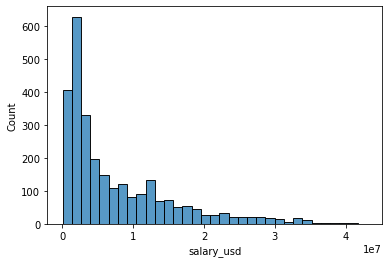

In [223]:
sns.histplot(dfd.salary_usd)

In [20]:
# 'more intuitive' 
dfd_nosf = dfd[['salary_usd','season','age','starter',\
               'threemade','efgpct','allreb','def_stat_adj','off_eff',
               'height_in','weight_lbs','C','PF','SG','PG']]

In [225]:
dfd_nosf.describe()

,salary_usd,season,age,starter,threemade,efgpct,allreb,def_stat_adj,off_eff,height_in,weight_lbs,C,PF,SG,PG
count,2.791000e+03,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000
mean,7.543609e+06,2016.835185,25.035113,0.550972,0.967216,0.514612,4.634540,-0.643963,12.424579,78.534934,219.825511,0.182730,0.203153,0.186313,0.231817
std,7.907872e+06,3.697145,3.729979,0.415162,0.849759,0.072989,2.632757,0.604480,7.007838,3.376725,26.609482,0.386514,0.402418,0.389429,0.422068
min,9.474000e+03,2004.000000,19.000000,0.000000,0.000000,0.000000,0.000000,-3.500000,-0.300000,70.000000,160.000000,0.000000,0.000000,0.000000,0.000000
25%,1.864620e+06,2015.000000,22.000000,0.099296,0.200000,0.480000,2.800000,-1.000000,7.000000,76.000000,197.000000,0.000000,0.000000,0.000000,0.000000
50%,4.062000e+06,2018.000000,25.000000,0.585366,0.800000,0.514000,4.100000,-0.600000,11.200000,79.000000,220.000000,0.000000,0.000000,0.000000,0.000000
75%,1.130000e+07,2020.000000,28.000000,1.000000,1.500000,0.550000,5.800000,-0.300000,16.600000,81.000000,240.000000,0.000000,0.000000,0.000000,0.000000
max,4.300636e+07,2021.000000,40.000000,1.000000,5.300000,1.000000,16.000000,2.300000,38.600000,88.000000,290.000000,1.000000,1.000000,1.000000,1.000000


### Hold out for test

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression    

In [434]:
X_tr, X_te, y_tr, y_te = train_test_split(dfd.iloc[:,1:], dfd['salary_usd'], test_size=0.2, random_state=42)  

### Split again for training and validate on the baseline regression model

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.2, random_state=42)  

baseline_lm = LinearRegression()
baseline_lm.fit(X_train, y_train)

b_lm_score = baseline_lm.score(X_val, y_val)

print(f"Baseline linear regression model r^2 score: {b_lm_score}")
for feature, coef in zip(X_tr.columns, baseline_lm.coef_):
    print(feature, ':', f'{coef:.2f}') 

Baseline linear regression model r^2 score: 0.5688789968562129
season : 268052.59
age : 869930.96
gameplayed : 25512.66
gamestarted : -76264.44
minpergame : -172038.31
fgmade : 12492097.26
fgattempt : 5529523.89
fgpct : 32514747.62
threemade : -4818061.51
threeattempt : -4603804.05
threepct : -311935.17
twomade : -6308744.07
twoattempt : -6071974.46
twopct : -12374226.30
efgpct : -33874862.22
ftmade : 1171386.76
ftattempt : 1270126.34
ftpct : 424977.48
offreb : -1922515.04
defreb : -1905295.61
allreb : 2366126.89
assist : 1116675.36
steals : -1152199.24
blocks : 831095.13
turnov : -674639.55
pfouls : -862844.40
points : -2009412.82
height_in : 52645.36
weight_lbs : 39893.59
C : -1251289.59
PF : -214468.57
PG : 238646.54
SF : 768333.48
SG : 458778.15
def_stat : -321104.11
def_stat_adj : 541740.29
off_eff : -218097.91
starter : 7949825.12


### Baseline regression model on inuitively narrowed dataset

In [24]:
X_tr, X_te, y_tr, y_te = train_test_split(dfd_nosf.iloc[:,1:], dfd_nosf['salary_usd'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.2, random_state=42)  

baselinen_lm = LinearRegression()
baselinen_lm.fit(X_train, y_train)

bn_lm_score = baselinen_lm.score(X_val, y_val)

print(f"Baseline linear regression model r^2 score on the narrower set of features: {bn_lm_score}")
for feature, coef in zip(X_tr.columns, baselinen_lm.coef_):
    print(feature, ':', f'{coef:.2f}') 

Baseline linear regression model r^2 score on the narrower set of features: 0.5317690865532445
season : 370825.56
age : 866598.71
starter : 2077568.60
threemade : 488365.85
efgpct : -14819637.75
allreb : 262469.82
def_stat_adj : 956290.49
off_eff : 440197.04
height_in : 112190.73
weight_lbs : 48217.77
C : -547354.97
PF : -386699.69
SG : 320940.47
PG : 922467.50


In [25]:
import seaborn as sns

In [77]:
sns.pairplot(data=dfd)

In [78]:
# do the baseline without season & use regularization to standardize and scale + log transformation on salary
# should look into season - 2021 (current) = to preserve the inflation
# age or season could be also looked into for debut year
# argue for why time series was also looked into (maybe increase r^2)

In [26]:
import statsmodels.api as sm

In [27]:
model = sm.OLS(y_tr, X_tr) 
fit = model.fit()
fit.summary()
#multicollinearity from Cond No. but adjusted R-Squared looks fairly good, AIC & BIC is pretty high 
#[see intro-to-regression-starter for more interpretation]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             salary_usd   R-squared (uncentered):                   0.763
Model:                            OLS   Adj. R-squared (uncentered):              0.762
Method:                 Least Squares   F-statistic:                              510.9
Date:                Thu, 30 Sep 2021   Prob (F-statistic):                        0.00
Time:                        00:41:41   Log-Likelihood:                         -37691.
No. Observations:                2232   AIC:                                  7.541e+04
Df Residuals:                    2218   BIC:                                  7.549e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
season        -1.43e+04   2687.612     -5.323      0.000   -1.96e+04   -9034.412
age           9.059e+05   3.15e+04     28.758      0.000    8.44e+05    9.68e+05
starter       1.468e+06    4.2e+05      3.497      0.000    6.45e+05    2.29e+06
threemade     9.185e+05   1.95e+05      4.709      0.000    5.36e+05     1.3e+06
efgpct       -1.095e+07   1.73e+06     -6.337      0.000   -1.43e+07   -7.56e+06
allreb        3.149e+05   7.58e+04      4.153      0.000    1.66e+05    4.64e+05
def_stat_adj  1.049e+06    1.9e+05      5.511      0.000    6.76e+05    1.42e+06
off_eff       4.131e+05      3e+04     13.751      0.000    3.54e+05    4.72e+05
height_in     4.043e+04   7.09e+04      0.570      0.569   -9.86e+04    1.79e+05
weight_lbs    3.762e+04   8723.830      4.313      0.000    2.05e+04    5.47e+04
C              3.24e+05   5.17e+05      0.627      0.531   -6.89e+05    1.34e+06
PF            9.096e+04   3.94e+05      0.231      0.818   -6.82e+05    8.64e+05
SG            1.688e+05   4.02e+05      0.420      0.675    -6.2e+05    9.58e+05
PG            4.223e+05   4.85e+05      0.870      0.384    -5.3e+05    1.37e+06
==============================================================================
Omnibus:                      257.570   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              445.945
Skew:                           0.775   Prob(JB):                     1.46e-97
Kurtosis:                       4.547   Cond. No.                     3.17e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Feature engineering - log transformation of the target variable "salary_usd"

<AxesSubplot:>

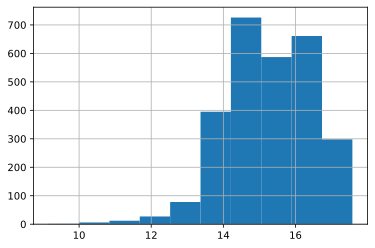

In [28]:
np.log(dfd.salary_usd).hist()
#better than raw target variable data, but now a bit too left skewed

Lambda: 0.1237938296979711


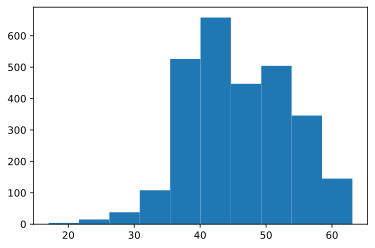

In [29]:
# box-cox looks better in transforming salary_usd to a more normal distribution
lamb=stats.boxcox_normmax(dfd.salary_usd, brack=(-3, 3))
print("Lambda:", lamb)
salary_bc=(np.power(dfd.salary_usd,0.1238)-1)/0.1238

plt.hist(salary_bc);

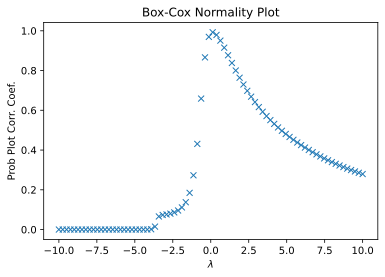

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
prob = stats.boxcox_normplot(dfd.salary_usd, -10, 10, plot=ax)

### Check in on r^2 with the transformed target variable (with CV)
Log-transformed - linear regression

In [31]:
# new dataframe
dfd2 = dfd.copy()
dfd2.drop(['season','SF'], axis=1, inplace=True)

In [32]:
# log transform on the target var
dfd2["salary_log"] = np.log10(dfd2.salary_usd)

# train(+val) & test split
X, y = dfd2.drop(['salary_usd','salary_log'],axis=1), dfd2['salary_log']
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
lm = LinearRegression()

lmcv_score = cross_validate(lm, X, y, cv=5, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
lmcv_score

{'fit_time': array([0.02702379, 0.01699781, 0.01321602, 0.01183009, 0.01159692]),
 'score_time': array([0.00284433, 0.00173736, 0.0014832 , 0.001436  , 0.00124693]),
 'test_r2': array([0.51266271, 0.56013114, 0.5848608 , 0.56132951, 0.57869943]),
 'train_r2': array([0.59313197, 0.58323528, 0.57954652, 0.5851218 , 0.5812775 ]),
 'test_neg_mean_squared_error': array([-0.11466319, -0.12914798, -0.10962905, -0.12307049, -0.10515165]),
 'train_neg_mean_squared_error': array([-0.11088875, -0.10751116, -0.11176007, -0.10852235, -0.11272781])}

In [34]:
print(f'Average training r2 for linreg with log10 target var: \t {np.mean(lmcv_score["train_r2"]):.3f}')
print(f'Average test r2 for linreg with log10 target var: \t {np.mean(lmcv_score["test_r2"]):.3f}')

Average training r2 for linreg with log10 target var: 	 0.584
Average test r2 for linreg with log10 target var: 	 0.560


In [35]:
def diagnostic_plots(y_pred, y_true, resid):
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))

    g1 = sns.regplot(x=y_pred, y=y_true, ci=False, fit_reg=False, line_kws={'color': 'blue'}, ax=axes[0], scatter_kws={'s': 5})
    g1.set_xlabel('Predicted Target')
    g1.set_ylabel('True Target')
    g1.plot(y_true, y_true, '--', color='gray')

    g2 = sns.regplot(x=y_pred, y=resid, lowess=True, ax=axes[1], line_kws={'color': 'red'}, scatter_kws={'s': 5})
    g2.set_xlabel('Predicted Target')
    g2.set_ylabel('Residual')
    g2.axhline(y=0, color='gray', linestyle='--')

    stats.probplot(resid, dist="norm", plot=axes[2])

    fig.suptitle('Diagnostic Plots');
    fig.tight_layout();

In [36]:
# checking the residuals
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=.25, random_state=10)

fit_tr = lm.fit(X_tr,y_tr)
fit_val = lm.fit(X_val,y_val)

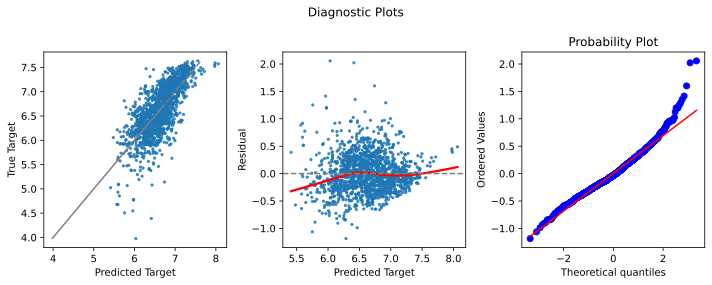

In [37]:
diagnostic_plots(fit_tr.predict(X_tr), y_tr, fit_tr.predict(X_tr)-y_tr)

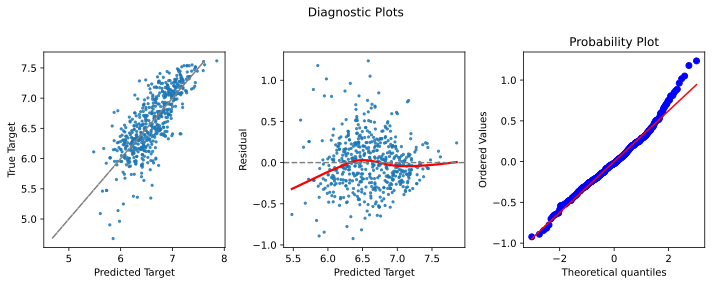

In [38]:
diagnostic_plots(fit_val.predict(X_val), y_val, fit_val.predict(X_val)-y_val)

Log10 R2 has slightly improved compared to baseline R2 (as well as being fairly consistent across k-folds), however there still exists an issue of abnormal residuals activity + some overfitting

### Check in on r^2 with the transformed target variable (with CV)
Box-cox - linear regression

In [39]:
# box-cox transform on the target var with the previously obtained lambda value
dfd2["salary_bc"] = salary_bc

# train(+val) & test split
X, y = dfd2.drop(['salary_usd','salary_log', 'salary_bc'],axis=1), dfd2['salary_bc']
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [40]:
lmcv_score = cross_validate(lm, X, y, cv=5, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
lmcv_score

{'fit_time': array([0.02549767, 0.01409483, 0.01181722, 0.01128078, 0.01255274]),
 'score_time': array([0.00294399, 0.00178409, 0.0014081 , 0.00135326, 0.00140619]),
 'test_r2': array([0.54991772, 0.58429598, 0.62296085, 0.58160486, 0.60014605]),
 'train_r2': array([0.6166074 , 0.60894498, 0.6015147 , 0.61125407, 0.6071087 ]),
 'test_neg_mean_squared_error': array([-24.47518718, -27.15456425, -21.95401396, -25.65973401,
        -22.68889868]),
 'train_neg_mean_squared_error': array([-23.20256325, -22.59790746, -23.76788617, -22.87746016,
        -23.56374369])}

In [41]:
print(f'Average training r2 for linreg with log10 target var: \t {np.mean(lmcv_score["train_r2"]):.3f}')
print(f'Average test r2 for linreg with log10 target var: \t {np.mean(lmcv_score["test_r2"]):.3f}')

Average training r2 for linreg with log10 target var: 	 0.609
Average test r2 for linreg with log10 target var: 	 0.588


In [42]:
# checking the residuals
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=.25, random_state=10)

fit_tr = lm.fit(X_tr,y_tr)
fit_val = lm.fit(X_val,y_val)

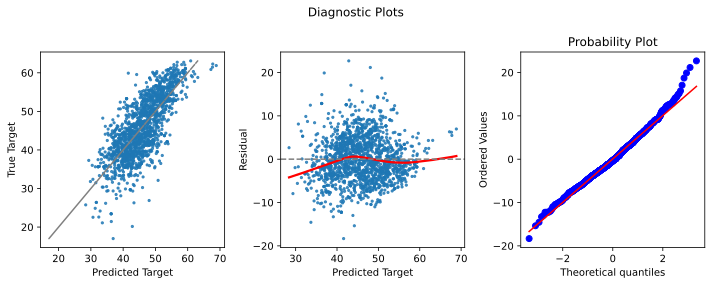

In [43]:
diagnostic_plots(fit_tr.predict(X_tr), y_tr, fit_tr.predict(X_tr)-y_tr)

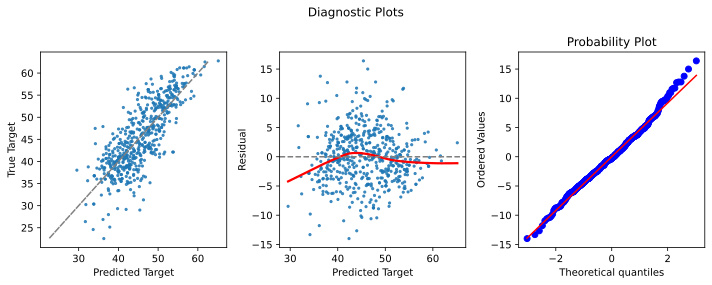

In [44]:
diagnostic_plots(fit_val.predict(X_val), y_val, fit_tr.predict(X_val)-y_val)

Box-Cox R2 has slightly improved compared to baseline R2 as well (+ fairly consistent across k-folds), however there still exists an issue of abnormal residuals activity + some overfitting

In [45]:
dfd2.to_csv("dfd2.csv")
# dfd2 = pd.read_csv("dfd2.csv")
# dfd2.drop(dfd2.iloc[:,0:1],axis=1, inplace=True)

## Improving the model performance 
### Using LARS Path to trim down on features

Quick look at correlation to set some expectations prior to running LARS

In [46]:
from sklearn.linear_model import lars_path
pd.set_option("display.max_columns", None)

In [333]:
dfd2.corr()
# corr = dfd2.corr()
# unstack = corr.unstack()
# unstacked = unstack.sort_values(ascending=False)
# print(unstacked[unstacked != 1][-50:])

# Based on correlation, seeing multicollinearity among multiple features:
# minpergame-gamestarted-any on-court performance stats, except blocks
# shot percetanges seem very meaningles for salary consideration
# fgpct-efgpct-twopct are related but not threepct
# positions don't really have a meaningful impact on target var
# those which are more correlated with the target variables: age, fgmade, off_eff, starter, allreb

,salary_usd,age,gameplayed,gamestarted,minpergame,fgmade,fgattempt,fgpct,threemade,threeattempt,threepct,twomade,twoattempt,twopct,efgpct,ftmade,ftattempt,ftpct,offreb,defreb,allreb,assist,steals,blocks,turnov,pfouls,points,height_in,weight_lbs,C,PF,PG,SG,def_stat,def_stat_adj,off_eff,starter,salary_log,salary_bc
salary_usd,1.000000,0.502679,0.076994,0.373052,0.470967,0.535092,0.528513,0.067446,0.375500,0.395001,0.110077,0.442980,0.426699,0.081560,0.111674,0.479657,0.468663,0.150652,0.161924,0.454730,0.385962,0.420830,0.297948,0.165575,0.468477,0.197029,0.551396,0.020392,0.096723,0.005513,0.014999,0.024559,-0.073852,0.317434,0.132826,0.566524,0.477134,0.849892,0.892965
age,0.502679,1.000000,-0.053860,0.028856,0.123094,0.069065,0.067818,0.042980,0.225962,0.221052,0.110476,-0.019056,-0.043850,0.126393,0.170833,0.021320,-0.002412,0.116981,-0.043214,0.121599,0.073447,0.174811,0.081942,-0.023647,0.046640,-0.027923,0.085148,-0.049556,-0.026473,-0.005695,0.005275,0.049241,-0.067921,0.038652,0.075654,0.124805,0.086766,0.470640,0.492013
gameplayed,0.076994,-0.053860,1.000000,0.583705,0.471764,0.349163,0.326925,0.175018,0.162055,0.144099,0.126335,0.324717,0.321593,0.102653,0.198367,0.286758,0.299946,0.183866,0.210094,0.294796,0.284716,0.224358,0.321857,0.170328,0.284324,0.288484,0.342577,-0.026803,0.021411,-0.043031,-0.019976,0.024037,0.025104,0.336906,0.050037,0.341278,0.317449,0.231413,0.205216
gamestarted,0.373052,0.028856,0.583705,1.000000,0.783643,0.680335,0.657522,0.163284,0.308151,0.306062,0.084877,0.636966,0.637923,0.078375,0.147164,0.575303,0.593317,0.135213,0.347223,0.564155,0.527578,0.470507,0.555182,0.303027,0.611126,0.485106,0.669941,0.008184,0.095987,-0.003120,-0.055708,0.020387,-0.034677,0.587625,0.107969,0.670451,0.899240,0.435822,0.436071
minpergame,0.470967,0.123094,0.471764,0.783643,1.000000,0.841368,0.851630,0.101009,0.478118,0.493242,0.217988,0.746100,0.770453,0.046742,0.136895,0.695684,0.697851,0.271977,0.300707,0.625572,0.556961,0.628492,0.710677,0.256841,0.762405,0.588931,0.837600,-0.109684,-0.027562,-0.146238,-0.058233,0.078332,0.016180,0.660049,0.070822,0.850950,0.820042,0.571841,0.569774
fgmade,0.535092,0.069065,0.349163,0.680335,0.841368,1.000000,0.971272,0.202841,0.476529,0.483409,0.200996,0.925936,0.924875,0.124563,0.191047,0.835831,0.822869,0.284471,0.310051,0.612975,0.550710,0.569786,0.549688,0.258634,0.791798,0.493555,0.985163,-0.028892,0.073772,-0.043825,-0.016411,0.048047,0.013582,0.552702,0.058840,0.961183,0.723091,0.559906,0.568032
fgattempt,0.528513,0.067818,0.326925,0.657522,0.851630,0.971272,1.000000,0.013675,0.585617,0.608448,0.270970,0.846768,0.888035,-0.030961,0.044704,0.824654,0.787382,0.341969,0.164380,0.518407,0.433243,0.618495,0.583390,0.137933,0.805119,0.437918,0.976726,-0.147986,-0.047376,-0.172577,-0.034180,0.105169,0.069226,0.490564,0.052395,0.967122,0.712177,0.556141,0.563727
fgpct,0.067446,0.042980,0.175018,0.163284,0.101009,0.202841,0.013675,1.000000,-0.277028,-0.329472,-0.228134,0.348551,0.207665,0.857930,0.872097,0.117494,0.197395,-0.114475,0.555782,0.386824,0.467222,-0.091184,-0.030684,0.476592,0.056443,0.316054,0.136652,0.422862,0.433168,0.520582,0.000624,-0.180728,-0.189890,0.314431,-0.006938,0.087020,0.144424,0.083690,0.081699
threemade,0.375500,0.225962,0.162055,0.308151,0.478118,0.476529,0.585617,-0.277028,1.000000,0.984595,0.554752,0.109840,0.156029,-0.127208,0.096259,0.345566,0.244047,0.441367,-0.343492,0.067452,-0.065132,0.363448,0.329981,-0.209191,0.347483,0.073636,0.560707,-0.345251,-0.321479,-0.382361,-0.080929,0.096648,0.244293,0.075515,0.000933,0.571999,0.351439,0.369509,0.377521
threeattempt,0.395001,0.221052,0.144099,0.306062,0.493242,0.483409,0.608448,-0.329472,0.984595,1.000000,0.527383,0.123805,0.175586,-0.144013,0.026007,0.370978,0.269716,0.435491,-0.356928,0.072383,-0.065948,0.391873,0.354008,-0.215117,0.378715,0.075901,0.569948,-0.359506,-0.330531,-0.403181,-0.079593,0.100233,0.249919,0.087558,0.011941,0.585244,0.361521,0.381337,0.391141


In [398]:
# XL, yL = dfd2.drop(['salary_usd','salary_log', 'salary_bc', 'C','PG','SG','PF','efgpct',\
#                    'allreb','twoattempt','fgpct','fgmade','gameplayed','fgattempt','gamestarted'\
#                    ,'weight_lbs','minpergame','steals','off_eff','twopct','threepct','ftmade',\
#                    'turnov','pfouls','ftattempt','offreb','ftpct','twomade','defreb','starter'\
#                    ,'def_stat'],axis=1), dfd2['salary_bc']

#!!! XL, yL = dfd2[['age','allreb','assist','turnov','points','def_stat','off_eff','starter']], dfd2['salary_bc']
XL, yL = dfd2[['age','allreb','assist','turnov','points','def_stat','off_eff','starter','threemade',\
              'pfouls','height_in','weight_lbs']], dfd2['salary_bc']

XL, XL_test, yL, yL_test = train_test_split(XL, yL, test_size=.2, random_state=10)

### LARS

In [391]:
from sklearn.linear_model import lars_path
from sklearn.preprocessing import StandardScaler

In [399]:
std = StandardScaler()
std.fit(XL.values)
XL_transformed = std.transform(XL.values)

In [400]:
print("Computing regularization path using the LARS ...")
alphas, order, coefs = lars_path(XL_transformed, yL.values, method='lasso')

Computing regularization path using the LARS ...


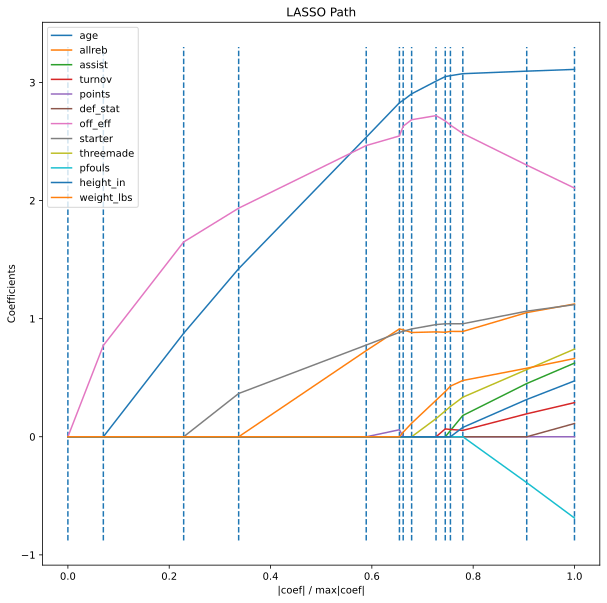

In [404]:
# plotting the LARS path

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(XL.columns) # look at the row below
plt.show()

In [402]:
names1 = []
for i in order:
    placeholder = XL.columns
    names1.append(placeholder[i])
names1

['off_eff',
 'age',
 'starter',
 'allreb',
 'weight_lbs',
 'threemade',
 'turnov',
 'assist',
 'height_in',
 'pfouls',
 'def_stat']

In [396]:
dfd2.to_csv("dfd2.csv")
# dfd2 = pd.read_csv("dfd2.csv")
# dfd2.drop(dfnew.iloc[:,0:1],axis=1, inplace=True)

## Rerun the models using the narrowed set of data
Post-split standardization on height

In [443]:
dfh = dfd.copy()
dfh["salary_log"] = np.log10(dfd.salary_usd)
# dfh["salary_bc"] = salary_bc

# train(+val) & test split
X, y = dfh.drop(['salary_usd','salary_log','player_name','season'],axis=1), dfh['salary_log']
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

heightz(X)
heightz(X_test)
#!!!!!!!!!!! THIS NEEDS TO BE FIXED BECAUSE HEIGHT Z ACTUALLY NEEDS TO BE DONE ON THE POP!!!!!!!!#

X = X[['age','allreb','assist','turnov','points','def_stat','off_eff','starter','threemade',\
     'pfouls','height_z_by_pos','weight_lbs']]
X_test = X_test[['age','allreb','assist','turnov','points','def_stat','off_eff','starter','threemade',\
     'pfouls','height_z_by_pos','weight_lbs']]

In [444]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression

from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)

In [445]:
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.25, random_state=10)
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

### Baseline linear regression

In [446]:
scores = cross_val_score(lm, X_tr, y_tr, cv=kfold)
print(scores)
print("Linear Reg Mean Score: ", np.mean(scores))

# Build the Model
lm.fit(X_tr, y_tr)

[0.51147043 0.49255465 0.56260532 0.5516844  0.54265611]
Linear Reg Mean Score:  0.5321941816899187


LinearRegression()

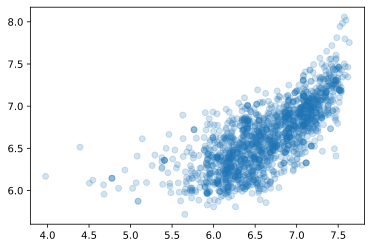

In [449]:
y_train_pred = lm.predict(X_tr)

plt.scatter(y_tr, y_train_pred, alpha=0.2)

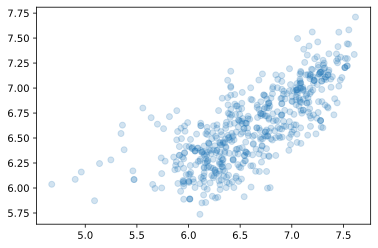

In [451]:
y_test_pred = lm.predict(X_val)

plt.scatter(y_val, y_test_pred, alpha=0.2)

Text(0.5, 1.0, 'Residuals vs. Predictions')

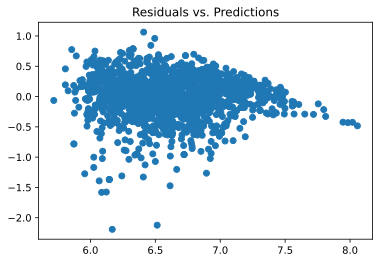

In [452]:
lin_reg_residuals = y_tr - y_train_pred

plt.scatter(y_train_pred, lin_reg_residuals)
# plt.plot([0,400], [0, 0])
plt.title("Residuals vs. Predictions")

### Regularization

In [465]:
def build_grid_search_est(model, X, y, cv=5, **params):

    grid_est = GridSearchCV(model, param_grid=params, cv=kfold, 
                            return_train_score=False)
    grid_est.fit(X, y)
    df = pd.DataFrame(grid_est.cv_results_)
    for param in params:
        df[param] = df.params.apply(lambda val: val[param])
#       plt.plot(np.log(df.alpha), df.mean_test_score);
        plt.semilogx(df.alpha, df.mean_test_score)
    return grid_est

Lasso Grid Search


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09693086067832724, tolerance: 0.03682148188992452
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08921931085032497, tolerance: 0.03478587535088404
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09538348905908833, tolerance: 0.03592750817834035
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/li

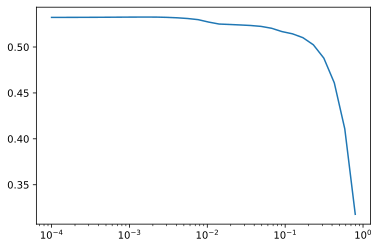

In [466]:
print("Lasso Grid Search")
lasso_grid_est = build_grid_search_est(Lasso(), X_tr, y_tr, cv=kfold,
                                       alpha=np.logspace(-4, -.1, 30))

Ridge Grid Search


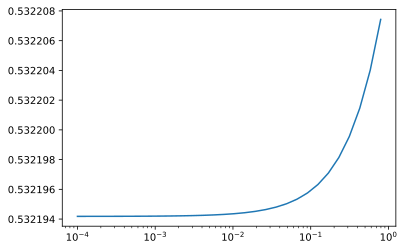

In [467]:
print("Ridge Grid Search")
ridge_grid_est = build_grid_search_est(Ridge(), X_tr, y_tr, cv=kfold,
                                       alpha=np.logspace(-4, -.1, 30))

Elastic Net Grid Search


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82.27230379949661, tolerance: 0.03621549978506522
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81.04925568486416, tolerance: 0.03595882251457321
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85.80618303302664, tolerance: 0.03682148188992452
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_m

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37.08761181258478, tolerance: 0.03478587535088404
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.845850576279318, tolerance: 0.03592750817834035
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.24810058273828, tolerance: 0.03621549978506522
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_m

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.721937205027, tolerance: 0.03682148188992452
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.7546148401092, tolerance: 0.03478587535088404
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.81025277293381, tolerance: 0.03592750817834035
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_mode

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83.09872237724917, tolerance: 0.03592750817834035
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52.78675867466238, tolerance: 0.03621549978506522
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.45739588520223, tolerance: 0.03595882251457321
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_m

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.15268548048644, tolerance: 0.03592750817834035
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6480772917107629, tolerance: 0.03682148188992452
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4698734703915477, tolerance: 0.03592750817834035
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58.29303006879988, tolerance: 0.03682148188992452
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52.745685171484084, tolerance: 0.03478587535088404
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55.71217038859494, tolerance: 0.03592750817834035
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3673971440088053, tolerance: 0.03592750817834035
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10000181959264864, tolerance: 0.03621549978506522
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1076281686304128, tolerance: 0.03592750817834035
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/line

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0998985125779086, tolerance: 0.03682148188992452
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09130874049662907, tolerance: 0.03478587535088404
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09809915917577428, tolerance: 0.03592750817834035
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/lin

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82.28057814215127, tolerance: 0.03621549978506522
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81.0548130909787, tolerance: 0.03595882251457321
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85.81369382761847, tolerance: 0.03682148188992452
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_mo

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3100840525968636, tolerance: 0.03682148188992452
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.002402400262298, tolerance: 0.03478587535088404
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8550096188796488, tolerance: 0.03592750817834035
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09391410952753176, tolerance: 0.03478587535088404
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10168921290298272, tolerance: 0.03592750817834035
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09636221563110325, tolerance: 0.03621549978506522
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/li

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10060413173218308, tolerance: 0.03592750817834035
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09640815347083276, tolerance: 0.03621549978506522
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1025404344097467, tolerance: 0.03682148188992452
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/lin

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83.10568005042758, tolerance: 0.03592750817834035
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.91605788492135, tolerance: 0.03621549978506522
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.995377968756586, tolerance: 0.03595882251457321
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.533808952354633, tolerance: 0.03592750817834035
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.21670005512550006, tolerance: 0.03682148188992452
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10179262007974899, tolerance: 0.03478587535088404
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/line

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09786920630830309, tolerance: 0.03621549978506522
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10543378790873703, tolerance: 0.03682148188992452
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09524273862027144, tolerance: 0.03478587535088404
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/li

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1011158462313233, tolerance: 0.03592750817834035
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10308556786591794, tolerance: 0.03682148188992452
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09325958438537896, tolerance: 0.03478587535088404
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/lin

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.121183619901302, tolerance: 0.03592750817834035
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.157070591241251, tolerance: 0.03621549978506522
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.977340794076994, tolerance: 0.03682148188992452
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10849727001087217, tolerance: 0.03592750817834035
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10026638096306328, tolerance: 0.03621549978506522
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10999707049825247, tolerance: 0.03682148188992452
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/li

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10465523098554286, tolerance: 0.03682148188992452
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09398157235864346, tolerance: 0.03478587535088404
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10210108476974256, tolerance: 0.03592750817834035
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/li

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.911179493899013, tolerance: 0.03682148188992452
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.558100902653493, tolerance: 0.03478587535088404
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.708930875390834, tolerance: 0.03592750817834035
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linea

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11081059598222964, tolerance: 0.03682148188992452
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09803165032133165, tolerance: 0.03478587535088404
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10763358337848672, tolerance: 0.03592750817834035
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/li

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82.31030586881114, tolerance: 0.03621549978506522
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81.07490446188405, tolerance: 0.03595882251457321
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85.8405088148636, tolerance: 0.03682148188992452
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_mo

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09819474372309855, tolerance: 0.03478587535088404
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10872534499017661, tolerance: 0.03592750817834035
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10936716020532344, tolerance: 0.03682148188992452
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/li

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2513853014525296, tolerance: 0.03621549978506522
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.069434801447926, tolerance: 0.03682148188992452
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.271563500043328, tolerance: 0.03478587535088404
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.79998725284794, tolerance: 0.03592750817834035
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.453597116441387, tolerance: 0.03621549978506522
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.26214180942975, tolerance: 0.03682148188992452
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_m

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82.41177601449169, tolerance: 0.03621549978506522
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81.1445839820706, tolerance: 0.03595882251457321
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85.9305748485092, tolerance: 0.03682148188992452
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_mod

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11360573970185328, tolerance: 0.03682148188992452
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82.52652343131697, tolerance: 0.03621549978506522
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81.22450731557483, tolerance: 0.03595882251457321
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83.01640447919064, tolerance: 0.03621549978506522
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81.5694144443514, tolerance: 0.03595882251457321
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86.46396515462764, tolerance: 0.03682148188992452
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_mo

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84.68144519740979, tolerance: 0.03621549978506522
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82.86490621824947, tolerance: 0.03595882251457321
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88.01530778234397, tolerance: 0.03682148188992452
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_m

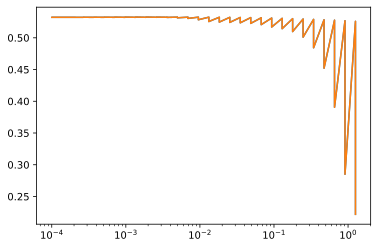

In [468]:
print("Elastic Net Grid Search")
elastic_net_grid_est = build_grid_search_est(ElasticNet(), X_tr, y_tr, cv=kfold,
                                             alpha=np.logspace(-4, 0.1, 30),
                                             l1_ratio=np.linspace(0,1,30,endpoint=False))

In [470]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = lm.predict(X_val)
print("Linear Regression:", r2_score(y_val, y_pred))

y_pred = lasso_grid_est.predict(X_val)
print("Lasso Regression:", r2_score(y_val, y_pred))

y_pred = ridge_grid_est.predict(X_val)
print("Ridge Regression:", r2_score(y_val, y_pred))

y_pred = elastic_net_grid_est.predict(X_val)
print("ElasticNet Regression:", r2_score(y_val, y_pred))

Linear Regression: 0.5633339825304196
Lasso Regression: 0.5612434490837549
Ridge Regression: 0.5632893925438124
ElasticNet Regression: 0.5609626363081972


In [477]:
lassocoef = pd.DataFrame(list(zip(X.columns, lasso_grid_est.best_estimator_.coef_)))
lassocoef

,0,1
0,age,0.052733
1,allreb,0.022099
2,assist,0.017336
3,turnov,0.000000
4,points,0.000000
5,def_stat,0.016375
6,off_eff,0.024830
7,starter,0.141093
8,threemade,0.037377
9,pfouls,-0.032502


In [478]:
ridgecoef = pd.DataFrame(list(zip(X.columns, ridge_grid_est.best_estimator_.coef_)))
ridgecoef

,0,1
0,age,0.052540
1,allreb,0.022716
2,assist,0.019868
3,turnov,0.000687
4,points,0.002026
5,def_stat,0.023828
6,off_eff,0.021207
7,starter,0.161888
8,threemade,0.043061
9,pfouls,-0.045127


In [479]:
elasticcoef = pd.DataFrame(list(zip(X.columns, elastic_net_grid_est.best_estimator_.coef_)))
elasticcoef

,0,1
0,age,0.052762
1,allreb,0.022025
2,assist,0.017211
3,turnov,0.000000
4,points,0.000000
5,def_stat,0.015522
6,off_eff,0.025006
7,starter,0.138438
8,threemade,0.036732
9,pfouls,-0.031047
